In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import system
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [4]:
from sklearn.tree import export_graphviz
from graphviz import Source

In [5]:
export_graphviz(
    tree_clf,
    out_file = 'iris_tree.dot',
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

<img src = 'iris_tree.png'>

In [6]:
dot = Source(export_graphviz(
    tree_clf,
    out_file = None,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names))

In [7]:
print(dot.source)

digraph Tree {
node [shape=box] ;
0 [label="petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor"] ;
2 -> 3 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica"] ;
2 -> 4 ;
}


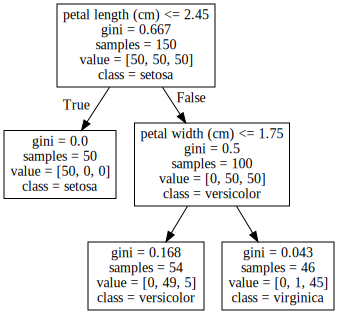

In [8]:
dot

In [9]:
from matplotlib.colors import ListedColormap

Text(4.05, 0.5, 'depth = 2')

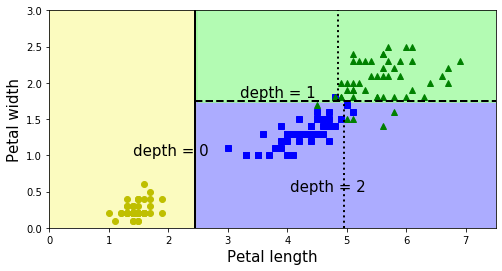

In [10]:
def plot_decision_boundary(clf, X, y, axes = [0, 7.5, 0, 3],
                          iris = True, legend = False,
                          plot_training = True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    
    x1, x2 = np.meshgrid(x1s, x2s)
    
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    
    plt.contourf(x1, x2, y_pred, cmap = custom_cmap, alpha = 0.8)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap = custom_cmap2, alpha = 0.8)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', label = 'Iris setosa')
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'Iris versicolor')
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], 'g^', label = 'Iris virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel('Petal length', fontsize = 15)
        plt.ylabel('Petal width', fontsize = 15)
    else:
        plt.xlabel(r'$X_1$', fontsize = 14)
        plt.ylabel(r'$X_2$', fontsize = 14)
    if legend:
        plt.legend(loc = 'lower right', fontsize = 14)

plt.figure(figsize = (8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth = 2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth = 2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

plt.text(1.40, 1.0, 'depth = 0', fontsize = 15)
plt.text(3.2, 1.8, 'depth = 1', fontsize = 15)
plt.text(4.05, 0.5, 'depth = 2', fontsize = 15)

In [11]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [12]:
tree_clf.predict([[5, 1.5]])

array([1])

In [13]:
from sklearn.datasets import make_moons

In [14]:
Xm, ym = make_moons(n_samples = 100, noise = 0.2, random_state = 52)

In [15]:
deep_tree_clf1 = DecisionTreeClassifier(random_state = 42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 4, random_state = 42)

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Text(0.5, 1.0, 'min_samples_leaf = 4')

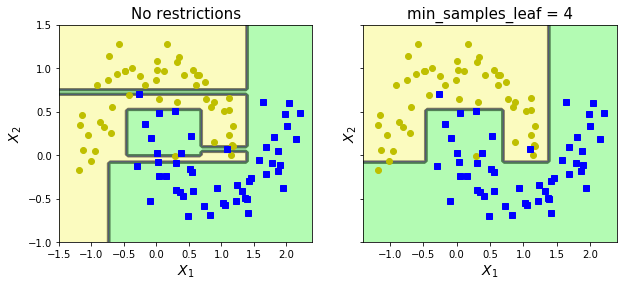

In [16]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)

plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes = [-1.5, 2.4, -1, 1.5], iris = False)
plt.title('No restrictions', fontsize = 15)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes = [-1.4, 2.4, -1, 1.5], iris = False)
plt.title('min_samples_leaf = {}'.format(deep_tree_clf2.min_samples_leaf), fontsize = 15)

In [17]:
export_graphviz(deep_tree_clf1,
               out_file = 'deep_tree_clf1.dot',
               feature_names = ['X1', 'X2'], 
               class_names = ['Class A', 'Class B'],
               rounded = True,
               filled = True)

export_graphviz(deep_tree_clf2,
               out_file = 'deep_tree_clf2.dot',
               feature_names = ['X1', 'X2'],
               class_names = ['Class A', 'Class B'],
               rounded = True,
               filled = True)

system('dot -Tpng deep_tree_clf1.dot -o clf1.png')
system('dot -Tpng deep_tree_clf2.dot -o clf2.png')

0

<h2>Deep tree classifier 1</h2>
<img src = 'clf1.png'>

<h2>Deep tree classifier 2</h2>
<img src = 'clf2.png'>

# Decision Tree Regression

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
X = 2*np.random.rand(100, 1)
y = 3*X+5+np.random.rand(100, 1)

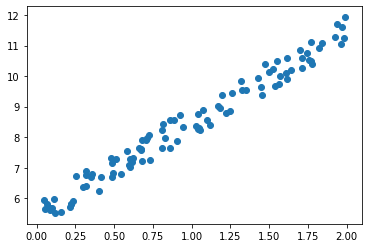

In [20]:
plt.scatter(X, y)

In [21]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
decision_line = tree_reg.predict(X_new)

### It's overfitted

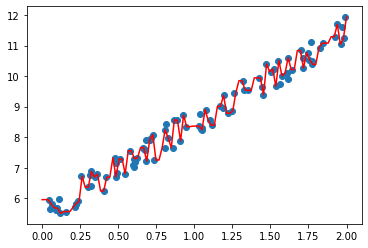

In [23]:
plt.scatter(X, y)
plt.plot(X_new, decision_line, 'red')

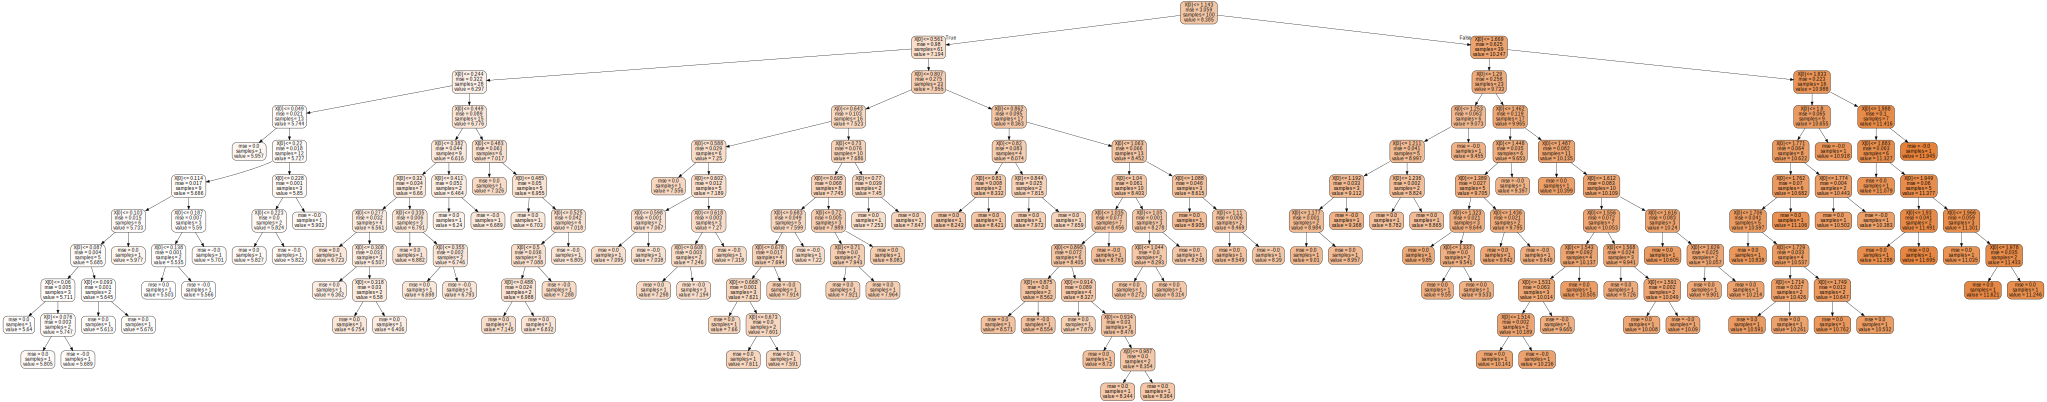

In [24]:
Source(export_graphviz(tree_reg, out_file = None,
                        rounded = True, filled = True))

In [25]:
tree_reg = DecisionTreeRegressor(max_depth = 5, max_leaf_nodes = 5)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
decision_line = tree_reg.predict(X_range)

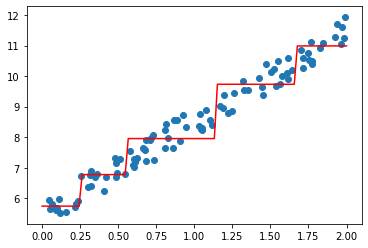

In [27]:
plt.scatter(X, y)
plt.plot(X_range, decision_line, 'red')

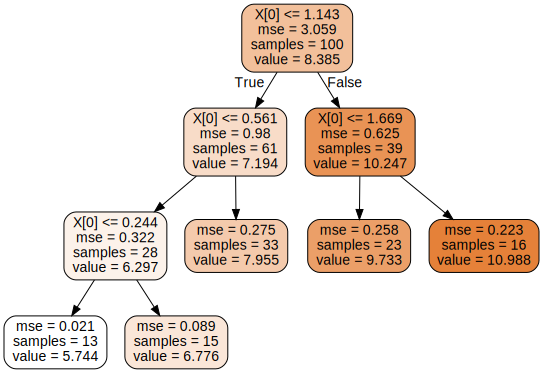

In [28]:
Source(export_graphviz(tree_reg, out_file = None, filled = True, rounded = True))

In [52]:
tree_reg = DecisionTreeRegressor(max_depth = 6, max_leaf_nodes = 6)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=6,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [53]:
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
decision_line = tree_reg.predict(X_range)

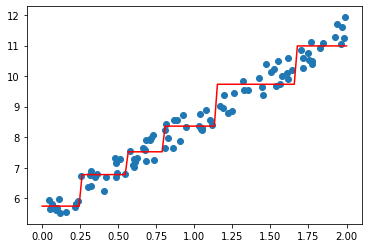

In [54]:
plt.scatter(X, y)
plt.plot(X_range, decision_line, 'red')